# Assignment 1: Neural Networks
# BA 64061-003
# Madeline Witzeman

# First Step: Loading the IMDb dataset

In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

# Second Step: Recreating the IMDb example studied in class so I have a baseline model to compare against when trying to improve model performance

## Preparing the data

Encoding the integer sequences via multi-hot encoding so the data is ready to be fed into a neural network

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Vectorizing labels:

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Building the model

Defining the model:

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model:

In [5]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Validating approach

Setting aside validation set:

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model (using epoch = 4, determined as best epoch value in the textbook):

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 9s 237ms/step - loss: 0.5537 - accuracy: 0.7701 - val_loss: 0.4257 - val_accuracy: 0.8623
Epoch 2/4
30/30 [==============================] - 1s 43ms/step - loss: 0.3569 - accuracy: 0.8880 - val_loss: 0.3384 - val_accuracy: 0.8762
Epoch 3/4
30/30 [==============================] - 1s 42ms/step - loss: 0.2684 - accuracy: 0.9137 - val_loss: 0.3033 - val_accuracy: 0.8817
Epoch 4/4
30/30 [==============================] - 1s 40ms/step - loss: 0.2154 - accuracy: 0.9314 - val_loss: 0.2848 - val_accuracy: 0.8875


In [37]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.2992 - accuracy: 0.8805


[0.2992163598537445, 0.8805199861526489]

Using two hidden layers, 16 hidden units, binary_crossentropy loss function, relu activation, and epoch = 4 yields 88.34% accuracy on the validation dataset and 87.69% accuracy on the test dataset, on average.

Since the neural network I'm utilizing implements stochastic learning, the model produces different validation and test accuracies each time it is run. To arrive at the validation and test accuracies for each model, I will take the average of 5 runs:

1.   Val: .8837; Test: .8789
2.   Val: .8762; Test: .8666
3.   Val: .8846; Test: .8785
4.   Val: .8879; Test: .8847
5.   Val: .8847; Test: .8756

Average - Val: .8834; Test: .8769



Now that I know the validation and test accuracy of the baseline model, I'm going to try various approaches to improve the model's performance by altering one parameter at a time.

# Next approach: Using one hidden layer instead of two hidden layers

## Retraining the model

In [38]:
model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_2.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 3s 92ms/step - loss: 0.5031 - accuracy: 0.7867 - val_loss: 0.3844 - val_accuracy: 0.8691
Epoch 2/4
30/30 [==============================] - 1s 37ms/step - loss: 0.3186 - accuracy: 0.8987 - val_loss: 0.3169 - val_accuracy: 0.8864
Epoch 3/4
30/30 [==============================] - 1s 37ms/step - loss: 0.2506 - accuracy: 0.9207 - val_loss: 0.2947 - val_accuracy: 0.8851
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2967 - accuracy: 0.8816


[0.296701043844223, 0.881600022315979]

## Results

Using only one hidden layer increases the validation accuracy to 88.88% and the test accuracy to 88.26%.

Run data (accuracies):


1.   Val: .8868; Test: .8786
2.   Val: .8894; Test: .8839
3.   Val: .8894; Test: .8836
4.   Val: .8890; Test: .8839
5.   Val: .8894; Test: .8832

Average - Val: .8888; Test: .8826



# Using three hidden layers instead of two hidden layers

## Retraining the model

In [39]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_3.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_3.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 4s 95ms/step - loss: 0.5782 - accuracy: 0.7467 - val_loss: 0.4440 - val_accuracy: 0.8641
Epoch 2/4
30/30 [==============================] - 2s 53ms/step - loss: 0.3620 - accuracy: 0.8867 - val_loss: 0.3314 - val_accuracy: 0.8836
Epoch 3/4
30/30 [==============================] - 2s 61ms/step - loss: 0.2637 - accuracy: 0.9143 - val_loss: 0.2914 - val_accuracy: 0.8930
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3239 - accuracy: 0.8666


[0.3238890767097473, 0.866599977016449]

## Results

Using three hidden layers slightly increased the validation accuracy to 88.52% and the test accuracy to 87.94%.

Run data (accuracies):


1.   Val: .8890; Test: .8827
2.   Val: .8900; Test: .8840
3.   Val: .8879; Test: .8822
4.   Val: .8735; Test: .8668
5.   Val: .8857; Test: .8813

Average - Val: .8852; Test: .8794



## Using one hidden layer produced the best validation and test performance

# Increasing hidden units to 32 instead of 16

## Retraining the model

In [40]:
model_4 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_4.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_4.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 3s 88ms/step - loss: 0.5084 - accuracy: 0.7716 - val_loss: 0.3613 - val_accuracy: 0.8701
Epoch 2/4
30/30 [==============================] - 2s 56ms/step - loss: 0.2980 - accuracy: 0.8943 - val_loss: 0.3023 - val_accuracy: 0.8801
Epoch 3/4
30/30 [==============================] - 2s 70ms/step - loss: 0.2300 - accuracy: 0.9183 - val_loss: 0.2752 - val_accuracy: 0.8894
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2998 - accuracy: 0.8784


[0.29975032806396484, 0.8784000277519226]

## Results

Using 32 hidden units in hidden layers slightly decreased the validation accuracy to 88.09% and the test accuracy to 87.31%. Since performance decreased for both the validation and test sets, I won't use 32 hidden units moving forward.




Run data (accuracies):


1.   Val: .8815; Test: .8712
2.   Val: .8880; Test: .8822
3.   Val: .8607; Test: .8486
4.   Val: .8869; Test: .8810
5.   Val: .8874; Test: .8825

Average - Val: .8809; Test: .8731



# Increasing hidden units to 64 instead of 16

## Retraining the model

In [7]:
model_5 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_5.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_5.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 5s 101ms/step - loss: 0.4997 - accuracy: 0.7634 - val_loss: 0.4730 - val_accuracy: 0.7788
Epoch 2/4
30/30 [==============================] - 2s 68ms/step - loss: 0.3056 - accuracy: 0.8817 - val_loss: 0.3339 - val_accuracy: 0.8607
Epoch 3/4
30/30 [==============================] - 2s 66ms/step - loss: 0.2223 - accuracy: 0.9201 - val_loss: 0.2853 - val_accuracy: 0.8829
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3405 - accuracy: 0.8627


[0.3404843211174011, 0.8627200126647949]

## Results

Using 64 hidden units in hidden layers decreased the validation accuracy notably to 87.13% and the test accuracy to 86.06%. It appears that adding hidden units decreases model performance when using 4 epochs. Given this information, I won't use 64 hidden units moving forward.

Run data:


1.   Val: .8646; Test: .8535
2.   Val: .8882; Test: .8830
3.   Val: .8613; Test: .8478
4.   Val: .8637; Test: .8501
5.   Val: .8785; Test: .8686

Average - Val: .8713; Test: .8606



## Using 16 hidden units in hidden layers produced the best validation and test performance

# Using MSE loss function instead of binary_crossentropy

## Retraining the model

In [8]:
model_6 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_6.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model_6.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_6.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 3s 77ms/step - loss: 0.1806 - accuracy: 0.7602 - val_loss: 0.1396 - val_accuracy: 0.8245
Epoch 2/4
30/30 [==============================] - 1s 37ms/step - loss: 0.1027 - accuracy: 0.8905 - val_loss: 0.0985 - val_accuracy: 0.8845
Epoch 3/4
30/30 [==============================] - 1s 37ms/step - loss: 0.0773 - accuracy: 0.9153 - val_loss: 0.0967 - val_accuracy: 0.8717
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0889 - accuracy: 0.8854


[0.08893664926290512, 0.8853600025177002]

## Results

Using the mean squared error (mse) loss function kept the validation accuracy around 88.33% and slightly increased the test accuracy to 87.88%. Given this information, I may consider using the mse loss function moving forward.

Run data (accuracies):


1.   Val: .8727; Test: .8726
2.   Val: .8853; Test: .8809
3.   Val: .8840; Test: .8766
4.   Val: .8861; Test: .8812
5.   Val: .8883; Test: .8828

Average - Val: .8833; Test: .8788



# Using tanh activation instead of relu

## Retraining the model

In [9]:
model_7 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_7.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_7.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_7.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 4s 86ms/step - loss: 0.4927 - accuracy: 0.7977 - val_loss: 0.3712 - val_accuracy: 0.8659
Epoch 2/4
30/30 [==============================] - 1s 36ms/step - loss: 0.2958 - accuracy: 0.9011 - val_loss: 0.2963 - val_accuracy: 0.8835
Epoch 3/4
30/30 [==============================] - 1s 35ms/step - loss: 0.2177 - accuracy: 0.9260 - val_loss: 0.2718 - val_accuracy: 0.8888
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.8794


[0.2941983938217163, 0.8794400095939636]

## Results

Using the tanh activation slightly increased the validation accuracy to 88.48% and test accuracy to 87.78%. Given this information, I may consider using tanh activation moving forward.

Run data (accuracies):


1.   Val: .8841; Test: .8768
2.   Val: .8850; Test: .8777
3.   Val: .8890; Test: .8822
4.   Val: .8846; Test: .8784
5.   Val: .8812; Test: .8741

Average - Val: .8848; Test: .8778



# Attempt at optimizing the model based on prior results

# Using one hidden layer + 16 hidden units + mse loss function + tanh activation to explore model performance

## Retraining the model

In [7]:
model_8 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_8.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model_8.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_8.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 3s 78ms/step - loss: 0.1771 - accuracy: 0.7964 - val_loss: 0.1352 - val_accuracy: 0.8638
Epoch 2/4
30/30 [==============================] - 1s 38ms/step - loss: 0.1136 - accuracy: 0.8839 - val_loss: 0.1104 - val_accuracy: 0.8719
Epoch 3/4
30/30 [==============================] - 1s 38ms/step - loss: 0.0893 - accuracy: 0.9061 - val_loss: 0.0966 - val_accuracy: 0.8864
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0947 - accuracy: 0.8806


[0.0946979969739914, 0.8805999755859375]

## Results

I developed this model by using the number of hidden layers, number of hidden units, loss function, and activation that appeared to improve model performance in the earlier steps above. This model performed comparably to the model with one hidden layer, 16 hidden units, binary_crossentropy loss function, and relu activation (model 2) with a 88.67% validation accuracy and 88.31% test accuracy. The validation accuracy is slightly lower in this model, but the test accuracy is slightly higher. Additionally, another observation is that using the mse loss function vs. binary_crossentropy appears to decrease validation loss across all epochs.

Run data (accuracies):

1.   Val: .8878; Test: .8852
2.   Val: .8871; Test: .8827
3.   Val: .8893; Test: .8851
4.   Val: .8880; Test: .8830
5.   Val: .8812; Test: .8796

Average - Val: .8867; Test: .8831



# Using one hidden layer + 16 hidden units + binary_crossentropy loss function + tanh activation to explore model performance

## Retraining the model

In [8]:
model_9 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_9.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_9.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model_9.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 3s 77ms/step - loss: 0.5000 - accuracy: 0.7939 - val_loss: 0.3920 - val_accuracy: 0.8684
Epoch 2/4
30/30 [==============================] - 1s 39ms/step - loss: 0.3275 - accuracy: 0.8945 - val_loss: 0.3237 - val_accuracy: 0.8824
Epoch 3/4
30/30 [==============================] - 2s 61ms/step - loss: 0.2577 - accuracy: 0.9193 - val_loss: 0.2997 - val_accuracy: 0.8812
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2998 - accuracy: 0.8808


[0.29978853464126587, 0.8808000087738037]

## Results

I developed this model by adjusting model 8 to utilize the binary_crossentropy loss function since binary_crossentropy is generally most applicable to this type of classification problem. This model overall performed the best with 88.86% validation accuracy and 88.30% test accuracy. Although model 2 had slightly higher validation accuracy (88.88%), this model had higher test accuracy while still having a high validation accuracy.

Run data (accuracies):


1.   Val: .8879; Test: .8825
2.   Val: .8892; Test: .8848
3.   Val: .8917; Test: .8841
4.   Val: .8881; Test: .8831
5.   Val: .8860; Test: .8806

Average - Val: .8886; Test: .8830



# Models 2, 8, and 9 had the highest validation and test accuracies. Model 9 overall performed the best. These models all assumed 4 epochs - I'm going to increase the number of epochs in model 9 to twenty just to verify if epoch = 4 is truly the best.

## Rerunning model 9 with 20 epochs  to determine best epoch value

In [9]:
model_10 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_10.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_10.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model_10.evaluate(x_test, y_test)
results

Epoch 1/20
30/30 [==============================] - 3s 91ms/step - loss: 0.5243 - accuracy: 0.7901 - val_loss: 0.4231 - val_accuracy: 0.8585
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3533 - accuracy: 0.8909 - val_loss: 0.3441 - val_accuracy: 0.8760
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2808 - accuracy: 0.9097 - val_loss: 0.3051 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2352 - accuracy: 0.9261 - val_loss: 0.3011 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2041 - accuracy: 0.9356 - val_loss: 0.2767 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1813 - accuracy: 0.9437 - val_loss: 0.2773 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1601 - accuracy: 0.9502 - val_loss: 0.2877 - val_accuracy: 0.8836
Epoch 8/20
30

[0.4358838200569153, 0.8642399907112122]

Based on the output above, epoch = 5 appears to be the best value because it produces the lowest validation loss and highest validation accuracy. I'm going to observe the validation and test accuracies across 5 runs using epoch = 5 to confirm if the accuracies are higher using epoch = 5 vs. epoch = 4.

## Rerunning model 9 with the "best" epoch value (epoch = 5)

In [7]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_11.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
results = model_11.evaluate(x_test, y_test)
results

Epoch 1/5
30/30 [==============================] - 3s 77ms/step - loss: 0.5299 - accuracy: 0.7983 - val_loss: 0.4406 - val_accuracy: 0.8498
Epoch 2/5
30/30 [==============================] - 1s 36ms/step - loss: 0.3738 - accuracy: 0.8857 - val_loss: 0.3582 - val_accuracy: 0.8733
Epoch 3/5
30/30 [==============================] - 1s 36ms/step - loss: 0.3020 - accuracy: 0.9052 - val_loss: 0.3171 - val_accuracy: 0.8836
Epoch 4/5
30/30 [==============================] - 1s 37ms/step - loss: 0.2549 - accuracy: 0.9167 - val_loss: 0.3048 - val_accuracy: 0.8795
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2921 - accuracy: 0.8831


[0.2920955717563629, 0.883080005645752]

After running the model several times, adjusting the epoch value to 5 actually decreased the validation accuracy to 88.69% and the test accuracy to 87.99%. Model 9 (which used epoch = 4) still appears to be the best model generated.

Run data (accuracies):


1.   Val: .8839; Test: .8774
2.   Val: .8889; Test: .8818
3.   Val: .8838; Test: .8718
4.   Val: .8902; Test: .8842
5.   Val: .8878; Test: .8844

Average - Val: .8869; Test: .8799



# Conclusion

In [8]:
import pandas

In [9]:
data_models = [[2, 16, 'binary_crossentropy', 'relu'], [1, 16, 'binary_crossentropy', 'relu'], [3, 16, 'binary_crossentropy', 'relu'], [2, 32, 'binary_crossentropy', 'relu'], [2, 64, 'binary_crossentropy', 'relu'], [2, 16, 'mse', 'relu'], [2, 16, 'binary_crossentropy', 'tanh'], [1, 16, 'mse', 'tanh'], [1, 16, 'binary_crossentropy', 'tanh']]

In [10]:
df = pandas.DataFrame(data_models, index=[1,2,3,4,5,6,7,8,9], columns=['# of Hidden Layers', '# of Hidden Units', 'Loss Function', 'Activation'])
print(df)

   # of Hidden Layers  # of Hidden Units        Loss Function Activation
1                   2                 16  binary_crossentropy       relu
2                   1                 16  binary_crossentropy       relu
3                   3                 16  binary_crossentropy       relu
4                   2                 32  binary_crossentropy       relu
5                   2                 64  binary_crossentropy       relu
6                   2                 16                  mse       relu
7                   2                 16  binary_crossentropy       tanh
8                   1                 16                  mse       tanh
9                   1                 16  binary_crossentropy       tanh


In [13]:
data_avgs = [[88.34, 87.69], [88.88, 88.26], [88.52, 87.94], [88.09, 87.31], [87.13, 86.06], [88.33, 87.88], [88.48, 87.78], [88.67, 88.31], [88.86, 88.30]]

In [14]:
df2 = pandas.DataFrame(data_avgs, index=[1,2,3,4,5,6,7,8,9], columns=['Validation Accuracy', 'Test Accuracy'])
print(df2)

   Validation Accuracy  Test Accuracy
1                88.34          87.69
2                88.88          88.26
3                88.52          87.94
4                88.09          87.31
5                87.13          86.06
6                88.33          87.88
7                88.48          87.78
8                88.67          88.31
9                88.86          88.30


<Axes: title={'center': 'Model Performance'}, xlabel='Model Number', ylabel='Accuracy (%)'>

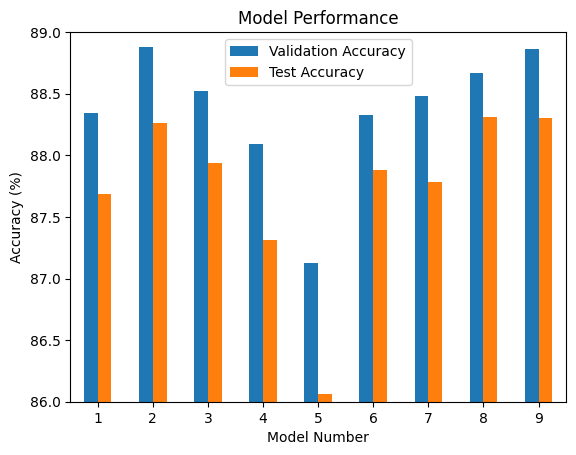

In [15]:
plot = df2.plot.bar(ylim=(86.0, 89.0), rot= 0, title="Model Performance")
plot.set_xlabel("Model Number")
plot.set_ylabel("Accuracy (%)")
plot

## In conclusion, all nine model validation and test accuracies fell within a relatively narrow range between roughy 86.0% and 89.0%. Additionally, all models were built using epoch = 4 after analysis determined this was the best epoch value. Increasing the number of hidden units negatively impacted model performance, as displayed by the lowest validation and test accuracies in models 4 and 5. Adjusting the loss function had minimal impact on model performance (model 6), while utilizing the tanh activation marginally improved model performance (model 7). Lastly, using only one hidden layer had the largest impact on improving model performance (models 2, 8, 9).

## Model 9 (1 hidden layer, 16 hidden units, binary_crossentropy loss function, tanh activation) overall had the best performance with 88.86% validation accuracy and 88.30% test accuracy. Model 2 (1 hidden layer, 16 hidden units, binary_crossentropy loss function, relu activation) was a very close second with 88.88% validation accuracy and 88.26% test accuracy.